# 3 (b)

In [ ]:
import numpy as np
import util
import matplotlib.pyplot as plt

In [2]:
class PoissonRegression:
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, step_size=1e-5, max_iter=10000, eps=1e-5,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose

    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        m,n= x.shape
        if self.theta is None:
            self.theta = np.zeros(n)
        prev_theta  = None
        i = 0
        while i < self.max_iter and (prev_theta is None or (np.sum(np.abs(prev_theta - self.theta))>= self.eps)):
            i+=1
            prev_theta = np.copy(self.theta)
            self._step(x,y)
            if self.verbose and i % 5 == 0:
                print('[iter: {:02d}, theta: {}]'
                      .format(i, [round(t, 5) for t in self.theta]))

        # *** END CODE HERE ***

    def _step(self,x,y):
        h_x = np.exp(x.dot(self.theta))
        ascent = np.expand_dims(y-h_x,1)*x
        self.theta += self.step_size * np.sum(ascent,axis=0)
    
    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Floating-point prediction for each input, shape (n_examples,).
        """
        # *** START CODE HERE ***
        y_hat = np.exp(x.dot(self.theta))
        return y_hat
        # *** END CODE HERE ***

In [3]:
def main(lr, train_path, eval_path, save_path):
    """Problem: Poisson regression with gradient ascent.

    Args:
        lr: Learning rate for gradient ascent.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        save_path: Path to save predictions.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***
    # Fit a Poisson Regression model
    clf = PoissonRegression()
    clf.fit(x_train,y_train)
    # Run on the validation set, and use np.savetxt to save outputs to save_path
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    p_eval = clf.predict(x_eval)
    np.savetxt(save_path, p_eval)
    plt.figure()
    plt.scatter(y_eval,p_eval,alpha=0.4,c='red',label='Ground Truth vs Predicted')
    plt.xlabel('Ground Truth')
    plt.ylabel('Predictions')
    plt.legend()
    plt.savefig('poisson_valid.png')
    # *** END CODE HERE ***

[iter: 05, theta: [0.4386, 0.15924, 0.27936, 0.59267, 0.48272]]
[iter: 10, theta: [0.51608, 0.2186, 0.29747, 0.51168, 0.53075]]
[iter: 15, theta: [0.58017, 0.26662, 0.31355, 0.45753, 0.55002]]
[iter: 20, theta: [0.63324, 0.30536, 0.32788, 0.41982, 0.55211]]
[iter: 25, theta: [0.67776, 0.33682, 0.34094, 0.39294, 0.54499]]
[iter: 30, theta: [0.7155, 0.36259, 0.35291, 0.37313, 0.53342]]
[iter: 35, theta: [0.7477, 0.38388, 0.36382, 0.35801, 0.52013]]
[iter: 40, theta: [0.77533, 0.40164, 0.37368, 0.34609, 0.50668]]
[iter: 45, theta: [0.7991, 0.41657, 0.38253, 0.33645, 0.49386]]
[iter: 50, theta: [0.81958, 0.4292, 0.39039, 0.3285, 0.48206]]
[iter: 55, theta: [0.83727, 0.43993, 0.39733, 0.32183, 0.47145]]
[iter: 60, theta: [0.85253, 0.4491, 0.40343, 0.31618, 0.46201]]
[iter: 65, theta: [0.86571, 0.45694, 0.40876, 0.31137, 0.45371]]
[iter: 70, theta: [0.87708, 0.46367, 0.41341, 0.30726, 0.44644]]
[iter: 75, theta: [0.8869, 0.46946, 0.41745, 0.30372, 0.44011]]
[iter: 80, theta: [0.89537, 0.4744

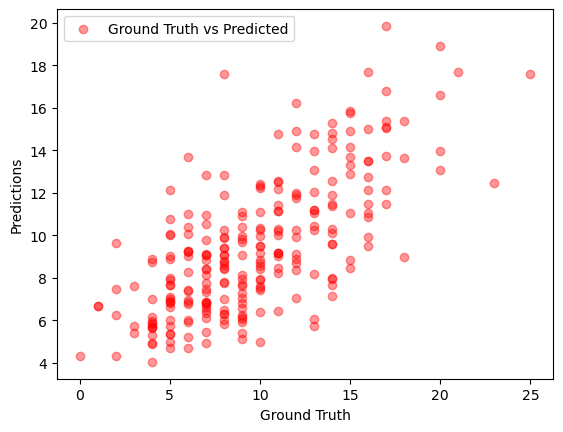

In [4]:
if __name__ == '__main__':
    main(lr=1e-5,
        train_path='train.csv',
        eval_path='valid.csv',
        save_path='poisson_pred.txt')